#yolov8 Görüntü Bölütleme

#ortam hazirliği

In [3]:
cd /content/drive/MyDrive/yolov8/3_image_segmentation


/content/drive/MyDrive/yolov8/3_image_segmentation


In [4]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/107.7 GB disk)


#test/prediction

In [3]:
!yolo segment predict model=yolov8n-seg.pt source='https://ultralytics.com/images/bus.jpg'  # predict with official model

100% 6.74M/6.74M [00:00<00:00, 67.7MB/s]
Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients, 12.6 GFLOPs

100% 134k/134k [00:00<00:00, 5.12MB/s]
image 1/1 /content/drive/MyDrive/yolov8/3_image_segmentation/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 494.8ms
Speed: 19.0ms preprocess, 494.8ms inference, 63.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


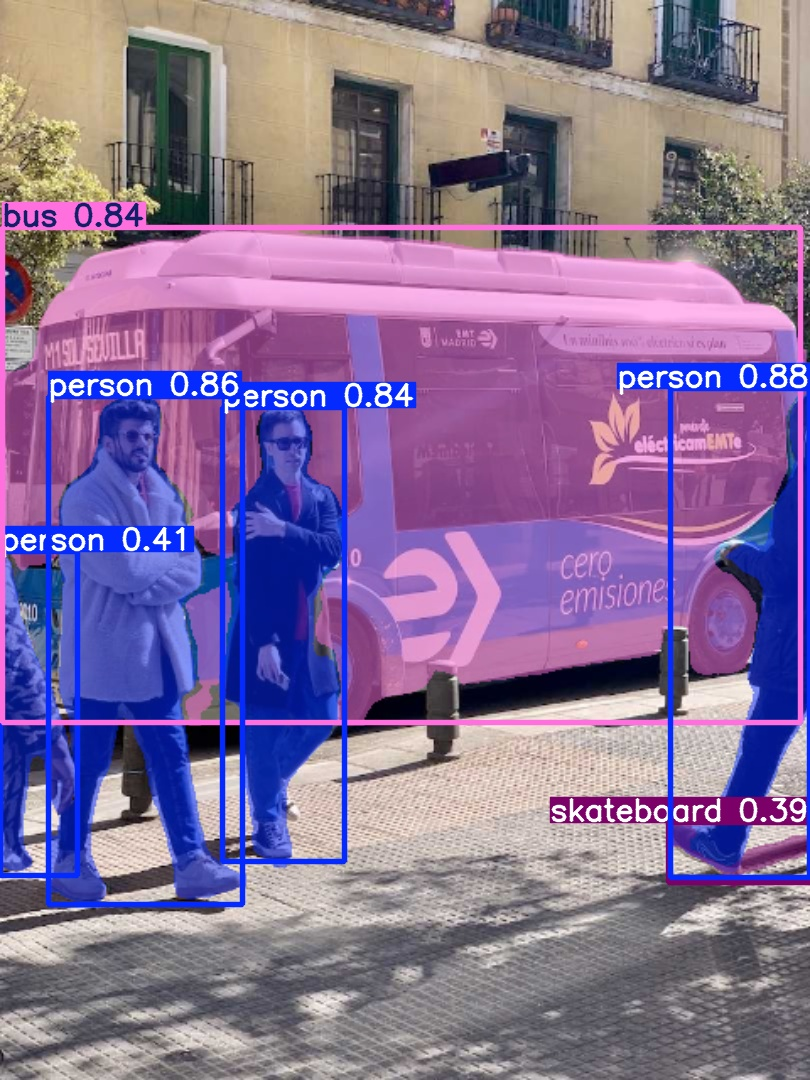

In [6]:
import cv2
from google.colab.patches import cv2_imshow
pathh="/content/drive/MyDrive/yolov8/3_image_segmentation/runs/segment/predict/bus.jpg"
img=cv2.imread(pathh)
cv2_imshow(img)

##python uygulamasi

In [5]:
import cv2
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

In [11]:
#veri çıkarma bloğu: #bbox'lar, sınıf kimliği, segmentasyon kimliği, skor değerlerimi döndüren metot yap
def extract_data(img, model):

 h, w, ch= img.shape#resmin yükseklik genişlik ve kanal değeri temel bir görüntü işleme bilgisi

 results= model.predict(source=img.copy(), save=False, save_txt=False)

 #yolonun dokümantasyonundan kaynaklı olarak bizim için önemli veriler 0. indiste
 result=results[0]
 #birazdan for döngüsüyle dolaştığımız değerleri bu listeye yaz
 seg_contour_idx=[]

#masks.xy ile segmentasyon değerlerine erişiyorum
 for seg in result.masks.xy:
   seg[:,0]=seg[:,0]*w
   seg[:,1]=seg[:,1]*h
   segment=np.array(seg, dtype=np.int32)
   seg_contour_idx.append(segment)

 bboxees=np.array(result.boxes.xyxy.cpu(), dtype="int")#çevirici dikdörtgene doğrudan böyle erişilir
 clas_id=np.array(result.boxes.cls.cpu(), dtype="int")
 score=np.array(result.boxes.conf.cpu(), dtype="float").round(2)




 return bboxees, clas_id, seg_contour_idx, score


0: 640x480 4 persons, 1 bus, 1 skateboard, 261.0ms
Speed: 4.0ms preprocess, 261.0ms inference, 18.7ms postprocess per image at shape (1, 3, 640, 480)


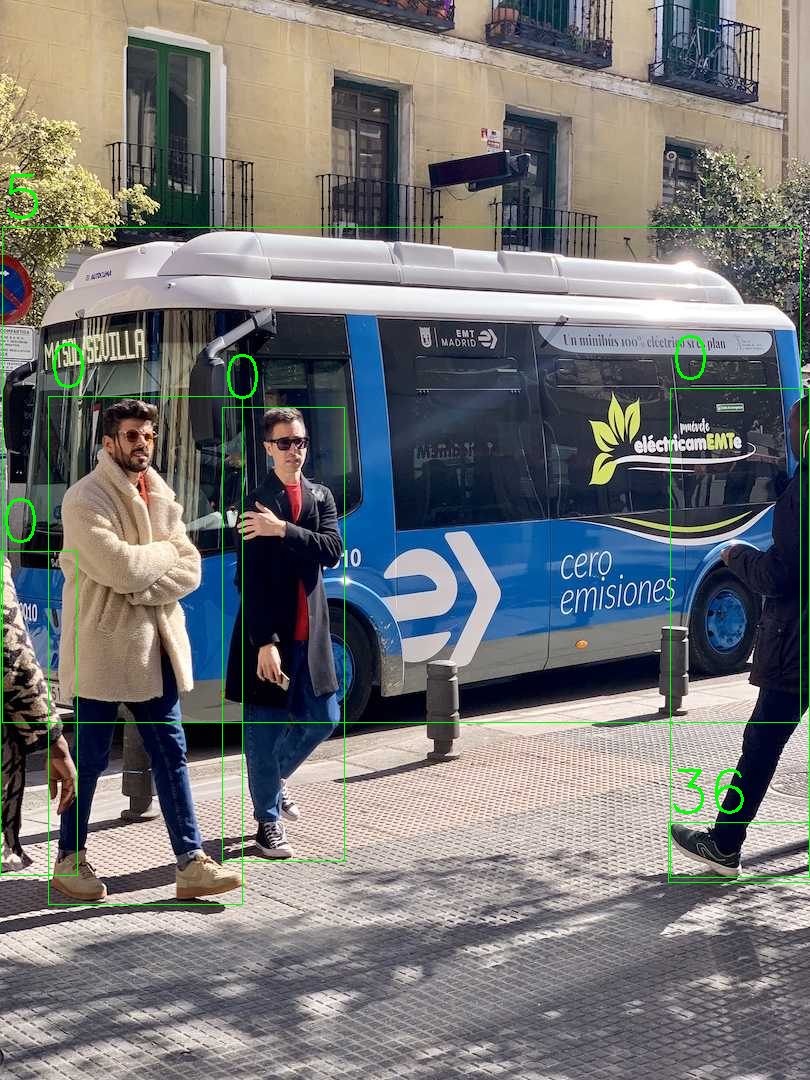

In [14]:
#python scripti ile sonuclara erisme


img_path="/content/drive/MyDrive/yolov8/3_image_segmentation/bus.jpg"
model_path="/content/drive/MyDrive/yolov8/3_image_segmentation/yolov8n-seg.pt"
img = cv2.imread(img_path)
model=YOLO(model_path)


#SEGMENTATION


#üst bloktaki metodu cagirdik
bboxes, clas_ids, seg_contour_idx, scores=extract_data(img, model)


font=cv2.FONT_HERSHEY_SIMPLEX
for box, class_id,segmentation_id, score in zip(bboxes, clas_ids, seg_contour_idx, scores):
  (xmin, ymin, xmax, ymax) = box
  cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 1)
  cv2.polylines(img,[segmentation_id],True, (255,0,0),2 )
  cv2.putText(img, str(class_id), (xmin,ymin - 10), font, 2,(0,255,0), 2  )

cv2_imshow(img)
